In [1]:
#Import the Dependencies
from sklearn.pipeline import Pipeline
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import statistics
import pandas_profiling
import pandas_profiling as pf
from pandas_profiling import ProfileReport

/var/folders/by/ymb55j1n39nd_1l6_11kg8j80000gn/T/ipykernel_83330/1946508069.py:19: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
fp=pd.read_csv('Heartdisease.csv')

In [3]:
fp.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
fp.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
fp.shape

(303, 14)

In [6]:
fp.groupby('target').count()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
target                                                                         
0       138  138  138       138   138  138      138      138    138      138   
1       165  165  165       165   165  165      165      165    165      165   

        slope   ca  thal  
target                    
0         138  138   138  
1         165  165   165

In [7]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
fp.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [9]:
fp.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
fp.duplicated().sum()

1

In [11]:
fp.drop_duplicates(inplace=True)

In [12]:
fp.duplicated().sum()

0

<AxesSubplot:xlabel='target', ylabel='count'>

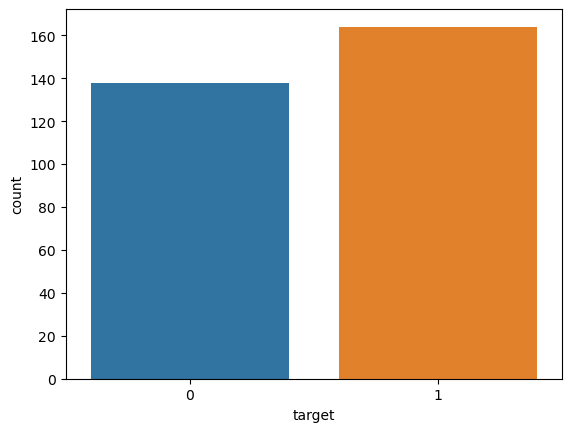

In [13]:
sns.countplot(x="target",data=fp)

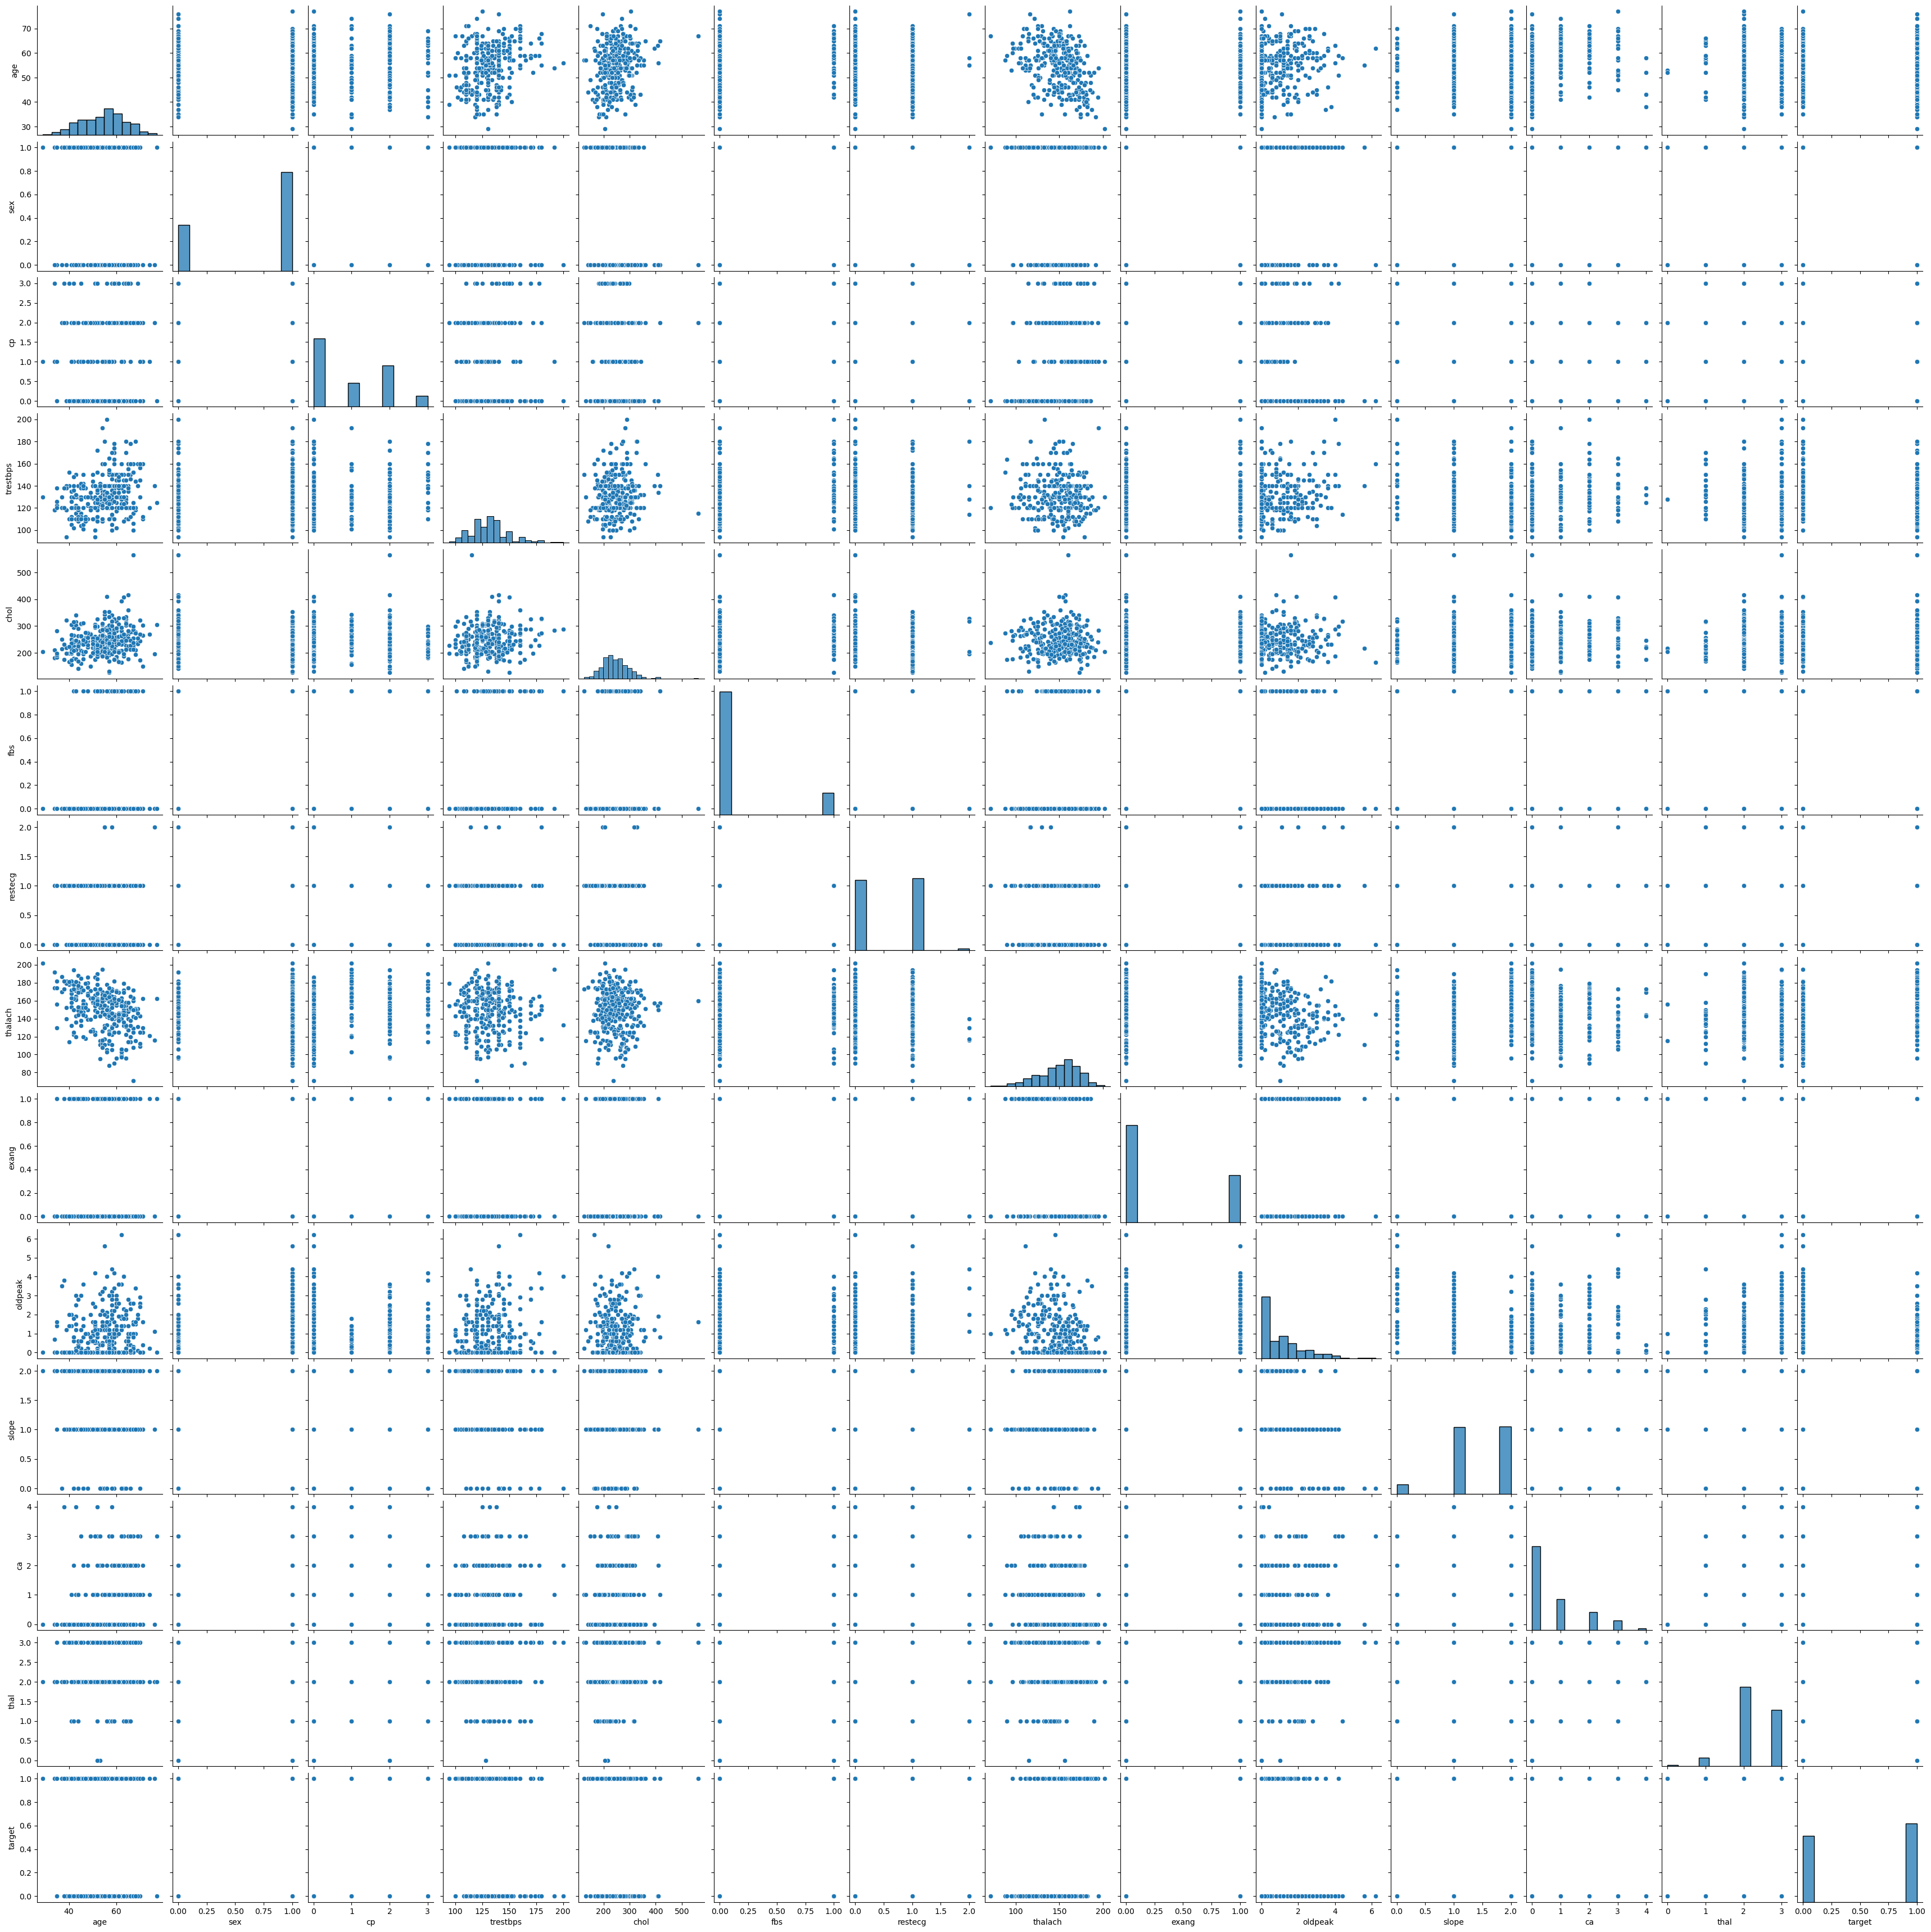

In [14]:
sns.pairplot(fp)

<AxesSubplot:>

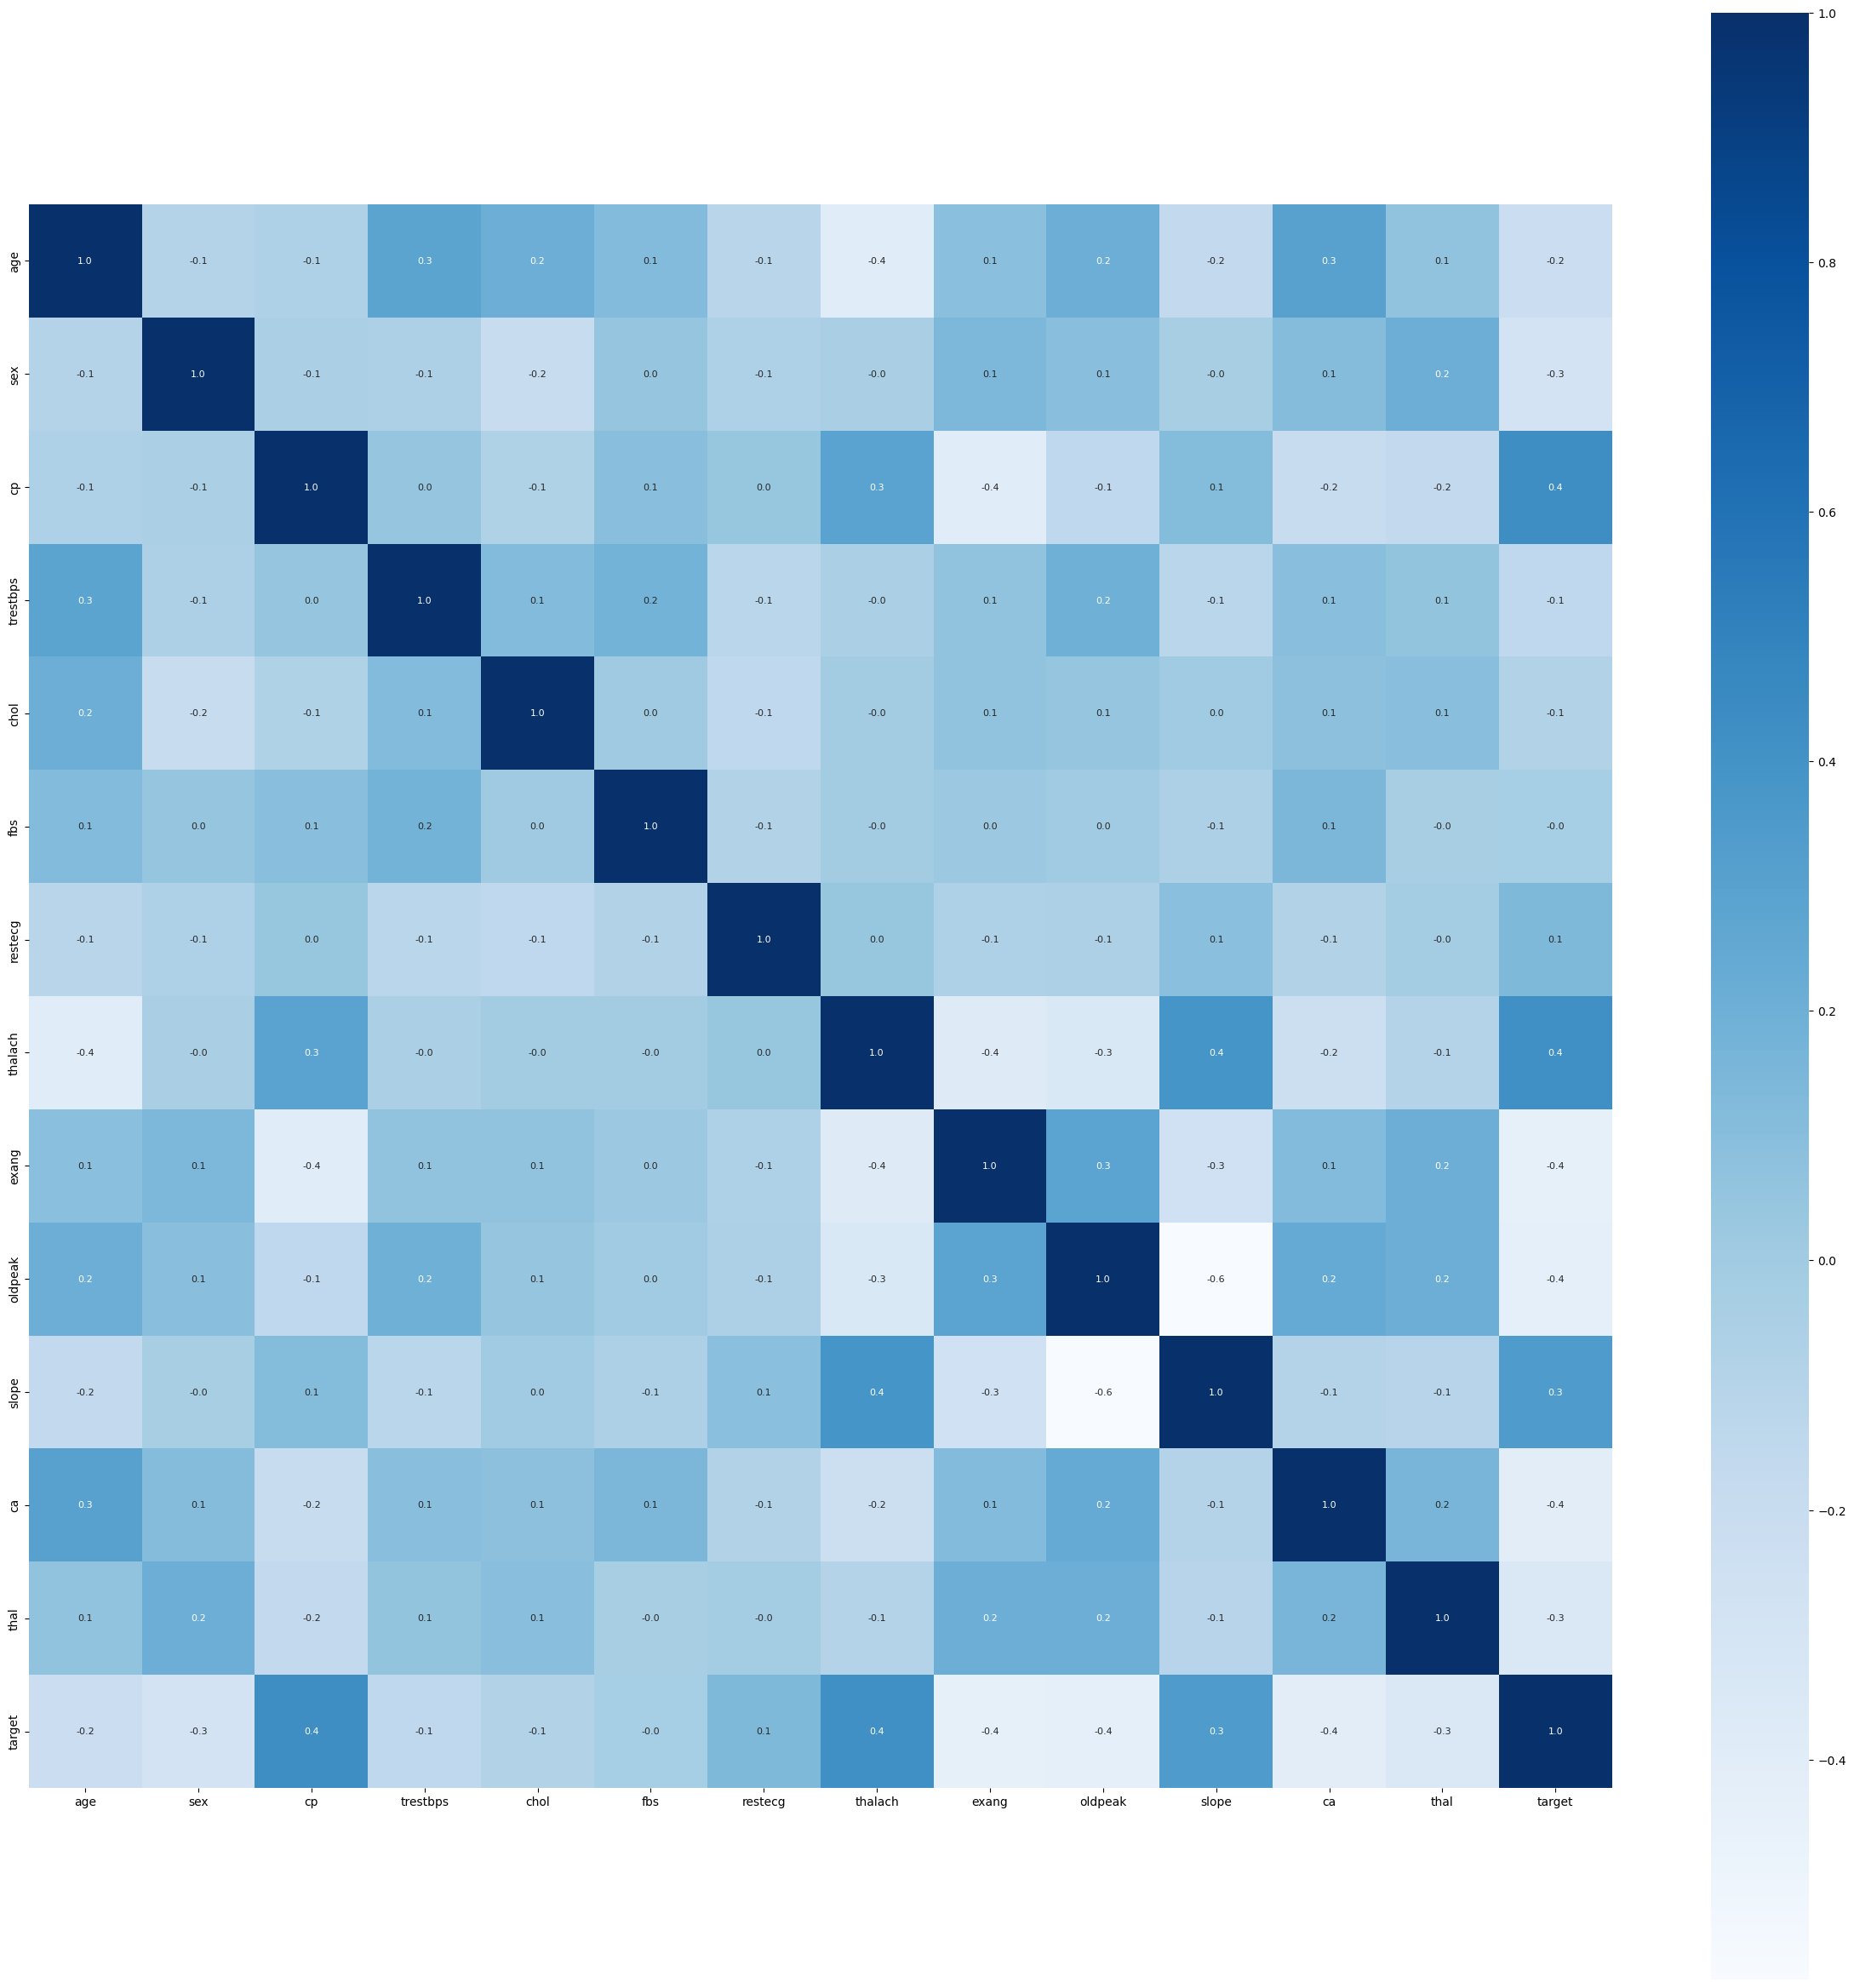

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(fp.corr(),cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

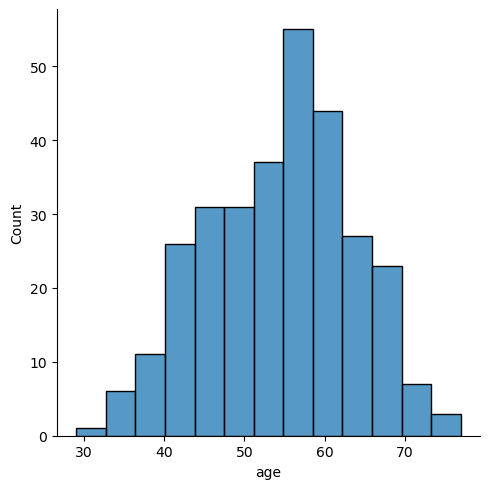

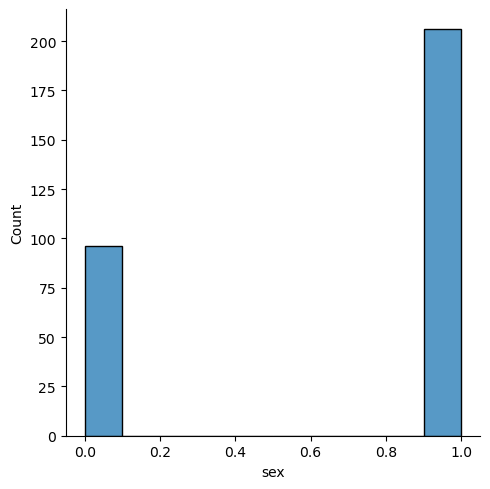

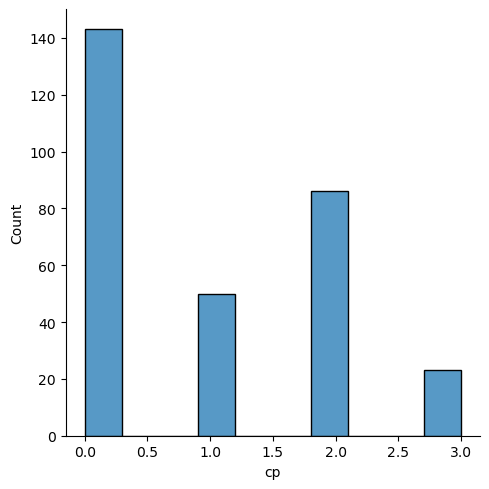

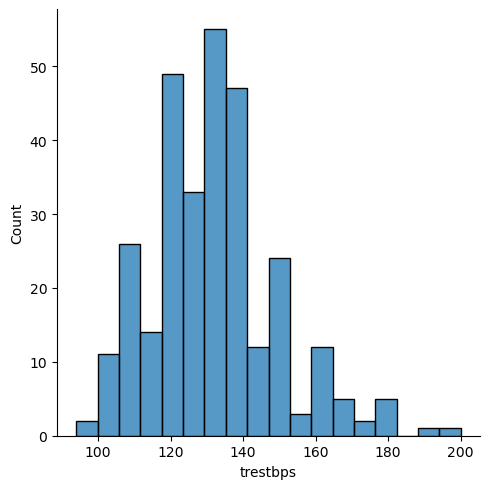

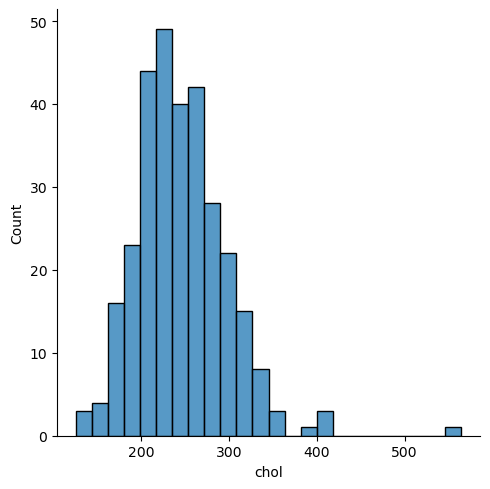

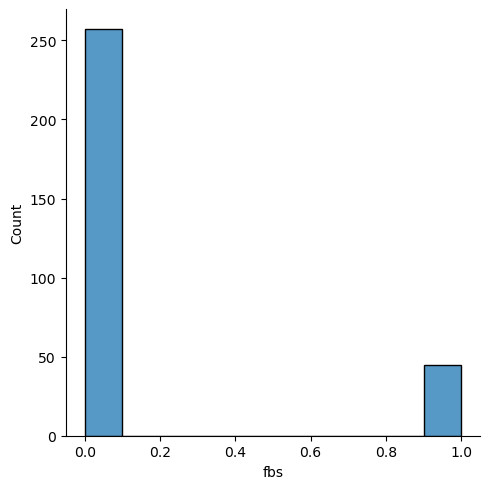

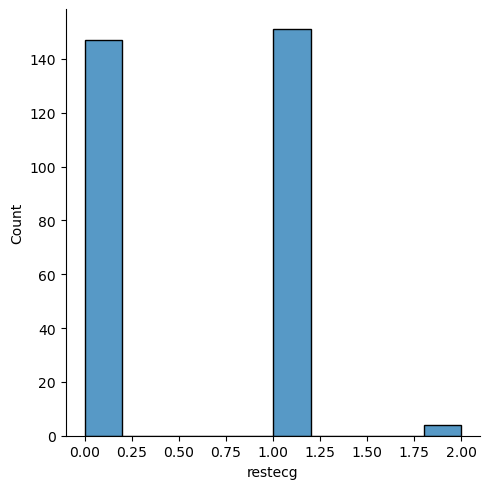

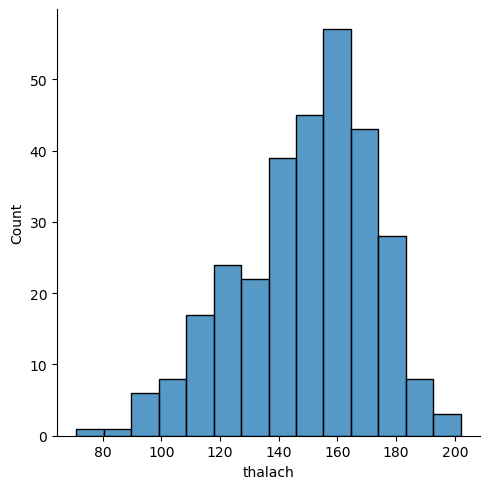

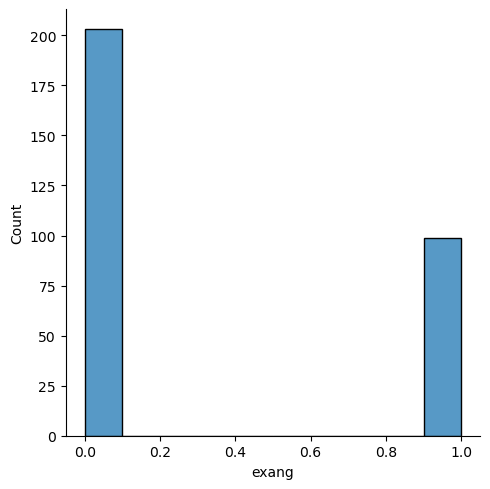

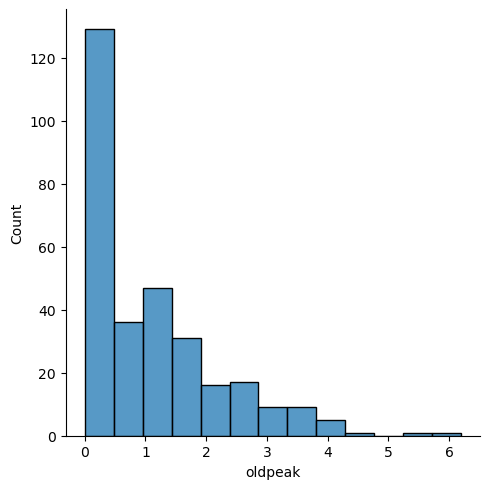

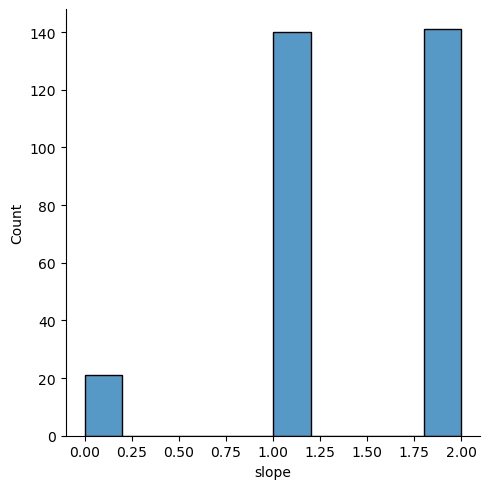

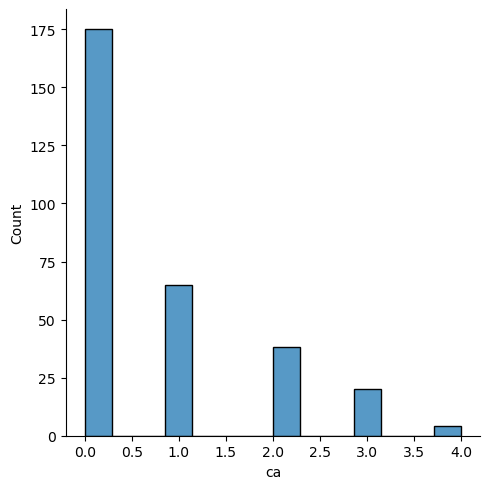

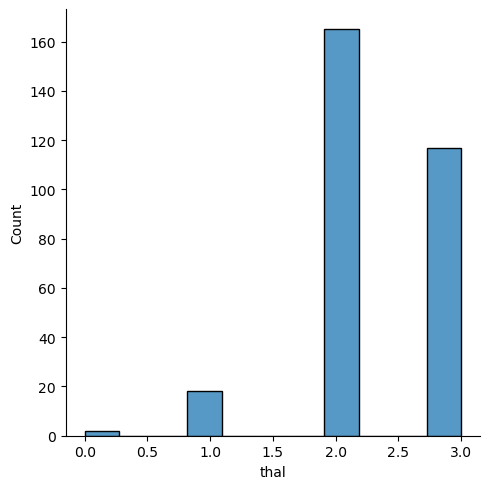

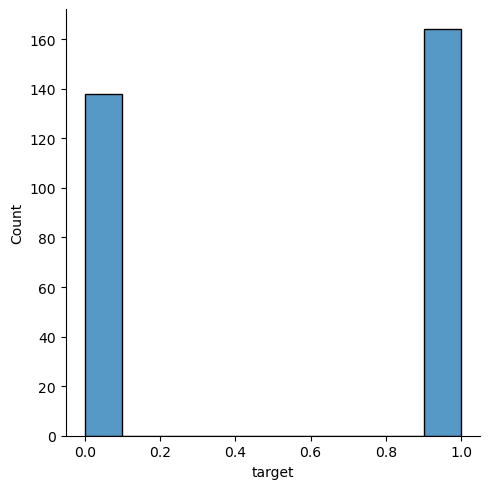

In [16]:
#creating for loop to get the distributon plot for all columns
for columns in fp:
    sns.displot(x=columns,data=fp)

In [17]:
fp['age'].std()

9.047969746247464

<AxesSubplot:xlabel='target', ylabel='chol'>

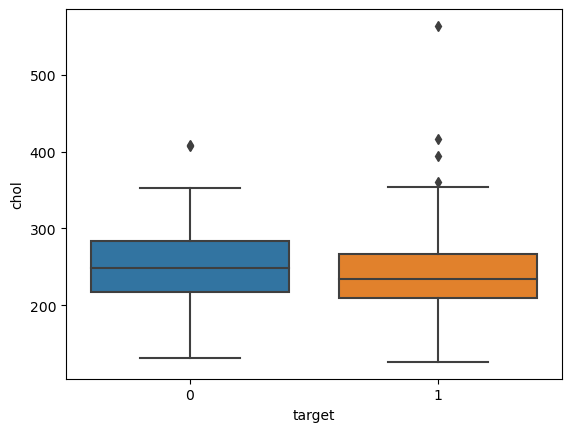

In [18]:
#or uuse sns for barplot
sns.boxplot(x='target',y="chol",data=fp)

<AxesSubplot:xlabel='target', ylabel='chol'>

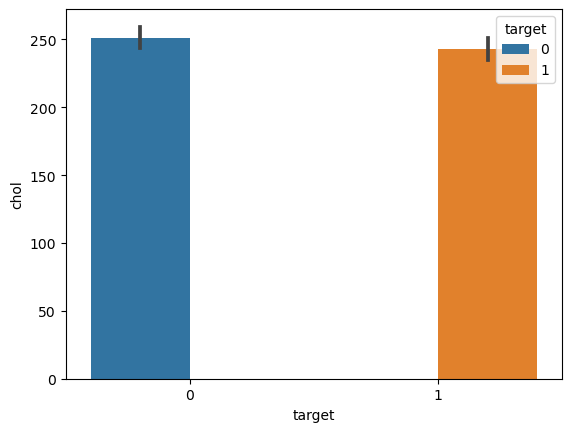

In [19]:
#or uuse sns for barplot
sns.barplot(x='target',y="chol",hue='target',data=fp)

<AxesSubplot:xlabel='target', ylabel='fbs'>

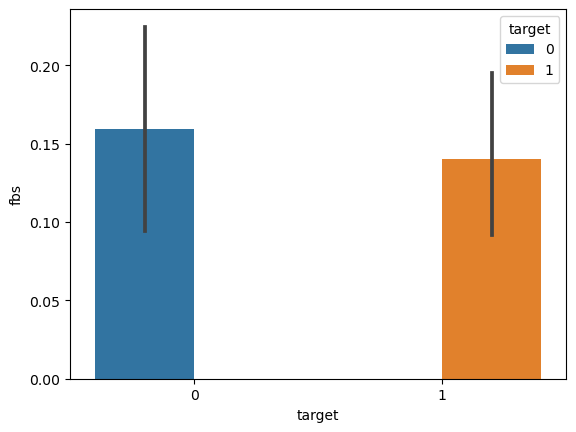

In [20]:
#or uuse sns for barplot
sns.barplot(x='target',y="fbs",hue='target',data=fp)

<AxesSubplot:xlabel='target', ylabel='thalach'>

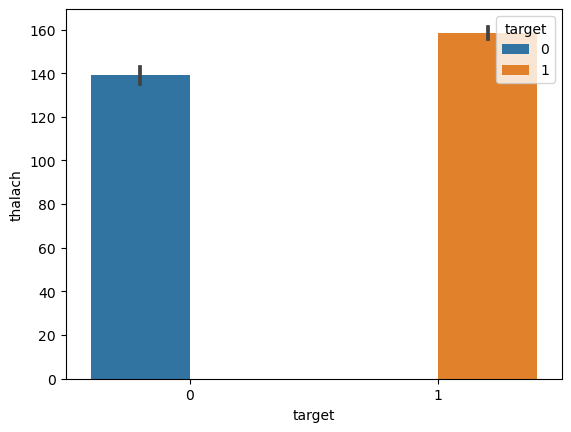

In [21]:
#or uuse sns for barplot
sns.barplot(x='target',y="thalach",hue='target',data=fp)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

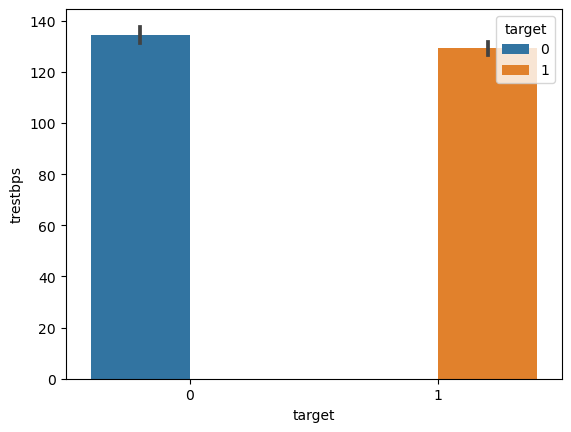

In [22]:
sns.barplot(x='target',y="trestbps",hue='target',data=fp)

<AxesSubplot:xlabel='target', ylabel='age'>

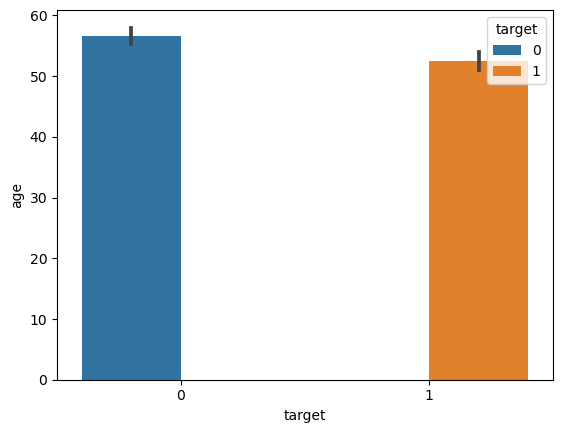

In [23]:
sns.barplot(x='target',y="age",hue='target',data=fp)

<AxesSubplot:xlabel='target', ylabel='slope'>

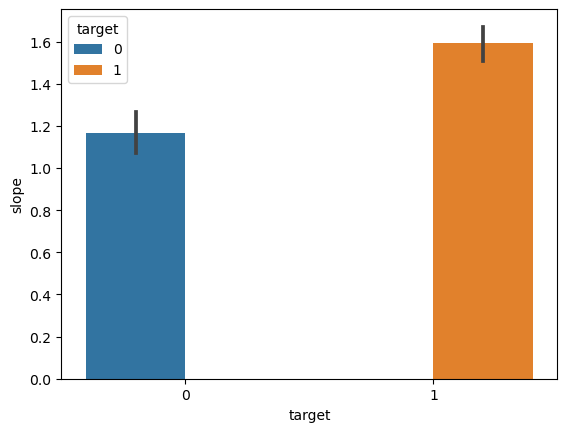

In [24]:
sns.barplot(x='target',y="slope",hue='target',data=fp)

<AxesSubplot:xlabel='target', ylabel='restecg'>

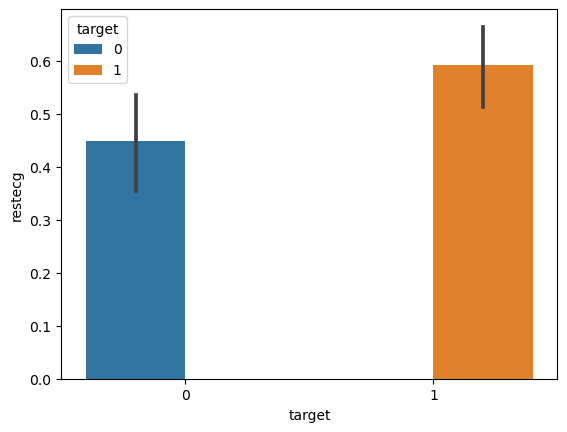

In [25]:
sns.barplot(x='target',y="restecg",hue='target',data=fp)

<AxesSubplot:xlabel='target', ylabel='exang'>

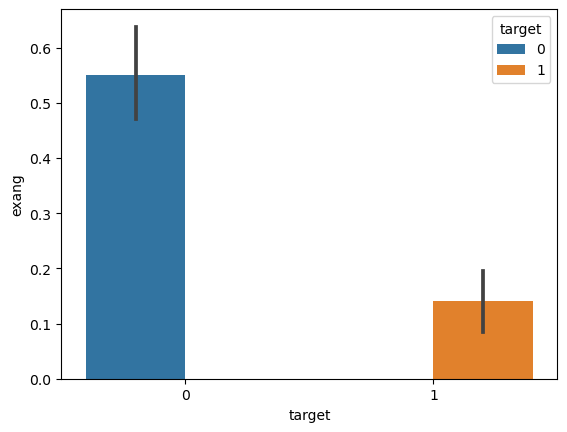

In [26]:
sns.barplot(x='target',y="exang",hue='target',data=fp)

In [27]:
kk=pandas_profiling.ProfileReport(fp)

In [28]:
kk

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
kk.to_file("Output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
X=fp.drop('target',axis=1)

In [31]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[302 rows x 13 columns]

In [32]:
Y=fp['target']

In [33]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
X=scalers.fit_transform(X)

In [35]:
X


array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
Std=StandardScaler()
X=Std.fit_transform(X)

In [38]:
X

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

# cross-Validation:it is a process in which we preserve some data for testing process


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [40]:
X.shape,X_train.shape,X_test.shape

((302, 13), (241, 13), (61, 13))

In [41]:
Y.shape,Y_train.shape,Y_test.shape

((302,), (241,), (61,))

## model Selection

In [42]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.8423
Logistic Regression:
trainAccuracy: 0.8548
Naive Bayes:
trainAccuracy: 0.8548
Support Vector Machine:
trainAccuracy: 0.9129
K-Nearest Neighbors:
trainAccuracy: 0.8797
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 0.9917


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


AdaBoost:
trainAccuracy: 0.9170
Gradient Boosting:
trainAccuracy: 0.9959
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.8033
Logistic Regression:
testingAccuracy: 0.7869
Naive Bayes:
testingAccuracy: 0.8197
Support Vector Machine:
testingAccuracy: 0.8361
K-Nearest Neighbors:
testingAccuracy: 0.8033
Decision Tree:
testingAccuracy: 0.7541
Random Forest:
testingAccuracy: 0.7869


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Bagging:
testingAccuracy: 0.7377
AdaBoost:
testingAccuracy: 0.7377
Gradient Boosting:
testingAccuracy: 0.8033
Extra Trees:
testingAccuracy: 0.7705


In [43]:
model=SVC()

In [44]:
lps=model.fit(X_train,Y_train)

In [45]:
X_train_prediction=lps.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [46]:
training_accuracy


0.9128630705394191

In [47]:
X_testing_prediction=lps.predict(X_test)
testing_accuracy=accuracy_score(X_testing_prediction,Y_test)

In [48]:
testing_accuracy


0.8360655737704918

<AxesSubplot:>

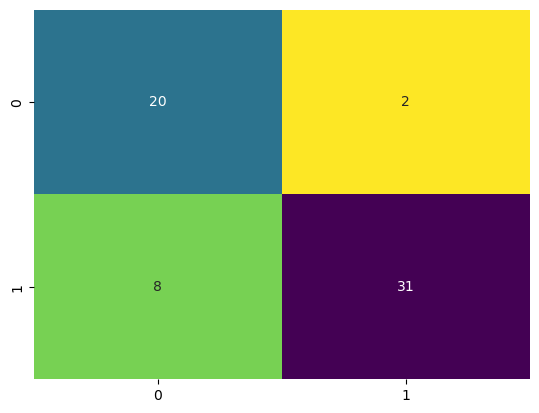

In [49]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_testing_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=lps.classes_, xticklabels=lps.classes_)

In [50]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Support Vector ')

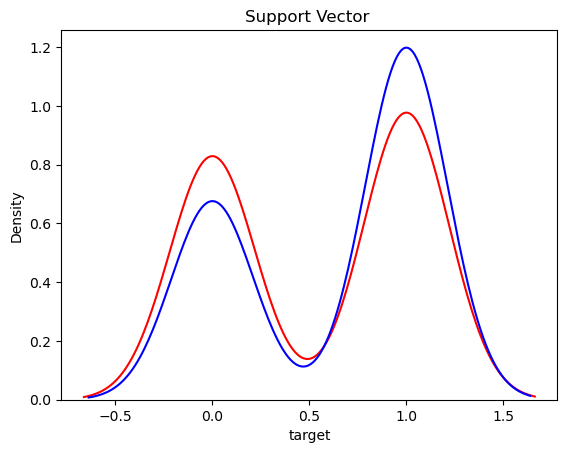

In [51]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Support Vector ')

In [52]:
# making a predictive System for testing the data 
# making a predictive System
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=scalers.transform(std_data)
print(std_data)
prediction=lps.predict(std_data)#model=SupportVector
print("target:",prediction)
if(prediction==0):
    print("Person doesnot have heart disease")
elif(prediction==1):
    print("Person Have Heart Disease")

[[0.70833333 1.         1.         0.48113208 0.24429224 1.
  0.         0.60305344 0.         0.37096774 0.         0.
  0.33333333]]
[[-0.58940972  1.          0.33333333 -0.88225347 -0.28711349  1.
   0.         -0.53738127  0.          0.05983351  0.          0.
   0.11111111]]
target: [1]
Person Have Heart Disease


/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [53]:
fp.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1